# BASİT DOGRUSAL REGRESYON
Bir bağımsız bir bağımlı değisken olacak

In [ ]:
import pandas as pd

df = pd.read_csv("data/Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head()

In [ ]:
df.info()

In [ ]:
import seaborn as sns

sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[["TV"]]  #bagimsiz degisken

In [ ]:
y = df[["sales"]]  #bagimli degisken

In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(x, y)

In [ ]:
model  # Model: fonksiyonu bulmak

In [ ]:
str(model)

In [ ]:
dir(model)

In [ ]:
model.intercept_  #beta0

In [ ]:
model.coef_  #beta1

In [ ]:
# rkare
model.score(x, y)  # bagimsiz degiskeni kullanınca bagimli degiskenin yüzde kacini aciklayabiliyoruz bilgisini sunar

# TAHMİN

In [ ]:
import matplotlib.pyplot as plt

g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title("Model denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış sayısı")
g.set_xlabel("Tv harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0);

Tv reklamlarına x harcama yaparsam satış/kazanc ne olur? Bu cevabı arıyoruz

In [ ]:
model.predict([[400]])  # Tahmin: fonksiyonu kullanarak tahminlerde bulunmak

In [ ]:
yeni_veri = [[5], [15], [30]]

In [ ]:
model.predict(yeni_veri)

# ARTIKLAR
MSE: Hata Kareler Ortalaması
RMSE: Hata Kareler Ortalamasının Karekökü

In [ ]:
y.head()

In [ ]:
model.predict(x)[0:6]

In [ ]:
gercek_y = y[0:10]

In [ ]:
tahmin_edilen_y = pd.DataFrame(model.predict(x)[0:10])

In [ ]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis=1)

In [ ]:
hatalar.columns = ["gercek", "tahmin edilen"]
hatalar

In [ ]:
hatalar["hata"] = hatalar["gercek"] - hatalar["tahmin edilen"]
hatalar

In [ ]:
hatalar["hata kareler"] = hatalar["hata"] ** 2
hatalar

In [ ]:

import numpy as np

np.mean(hatalar["hata kareler"])

# ÇOKLU DOGRUSAL REGRESYON
farkların karelerinin toplamını minimum yapmaya çalışacak şekilde katsayıları bulmaya çalışırız

In [ ]:
x = df.drop('sales', axis=1)  # bagimsiz
y = df[["sales"]]  # bagimli, iki köşeli parantez dataframe şeklinde çıktı olsun diye

In [ ]:
y.head()

In [ ]:
x.head()

# STATSMODELS İLE MODEL KURMAK

In [ ]:
import statsmodels.api as sm

In [ ]:
lm = sm.OLS(y, x)

In [ ]:
model = lm.fit()
model.summary()

# SCIKIT LEARN İLE MODEL KURMAK

In [ ]:
lm = LinearRegression()
model = lm.fit(x, y)
model.intercept_

In [ ]:
model.coef_

# TAHMIN
sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001

In [ ]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

In [ ]:
model.predict(yeni_veri)

In [ ]:
y.head()

In [ ]:
model.predict(x)[0:10]

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y, model.predict(x))
MSE

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

# MODEL TUNING(MODEL DOGRULAMA)

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
# sinama seti
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=99)

In [ ]:
x_train.head()

In [ ]:
y_train.head()

In [ ]:
x_test.head()

In [ ]:
y_test.head()

In [ ]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [ ]:
# egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

In [ ]:
# test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

# K-KATLI CROSS VALİDATİON
egitim setindeki oluşabilecek hataları daha doğru değerlendirmek için
yani doğrulanmıs hatadır

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# mse
np.mean(
    -cross_val_score(model, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))  #train setinde ortalama hata

In [ ]:
# rmse
np.sqrt(np.mean(
    -cross_val_score(model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")))  #train setinde ortalama hata)

In [ ]:
np.sqrt(np.mean(-cross_val_score(model, x, y, cv=10, scoring="neg_mean_squared_error")))

# RIDGE REGRESYON - L2
Amaç: hata kareler toplamını minimize eden katsayılar, bu katsayılara bir ceza uygulayarak bulmaktır
yanlıdır fakat varyansı küçüktür, çok boyutluluğa(değişken sayısı>gözlem sayısı) çözüm sunar, çoklu doğrulas bağlantı problemi olduğunda etkilidir, ilgisiz değiskenleri modelden çıkarmaz katsayılarını sıfıra yaklaştırır, lamda kritik roldedir, lamda için CV kullanılır
Hata kareler toplamını minimum yapan lambda'yı arıyoruz

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [ ]:
df = pd.read_csv("data/Hitters.csv")
df = df.dropna()  # eksik değerler silindi
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]  # bagimli degisken
x_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
ridge_model = Ridge(alpha=5).fit(x_train, y_train)
# ridge_model

In [ ]:
ridge_model.coef_

In [ ]:
ridge_model.intercept_

In [ ]:
lambdalar = 10 ** np.linspace(10, -2, 100) * 0.5
lambdalar

In [ ]:
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(x_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [ ]:
katsayilar

In [ ]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

# TAHMIN

In [ ]:
ridge_model = Ridge().fit(x_train, y_train)
y_pred = ridge_model.predict(x_train)
y_pred[0:10]

In [ ]:
y_train[0:10]

In [ ]:
# train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [ ]:
# test hatası
y_pred = ridge_model.predict(x_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

# MODEL TUNING

In [ ]:
ridge_model = Ridge(1).fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lambdalar1 = np.random.randint(0, 1000, 100)

In [ ]:
lambdalar2 = 10 ** np.linspace(10, -2, 100) * 0.5

In [ ]:
ridgeCv = RidgeCV(alphas=lambdalar1, scoring="neg_mean_squared_error", cv=10)
ridgeCv.fit(x_train, y_train)

In [ ]:
ridgeCv.alpha_

In [ ]:
# final model
ridge_tuned = Ridge(alpha=ridgeCv.alpha_).fit(x_train, y_train)

In [ ]:
y_pred = ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# LASSO REGRESSİON - L1
Hata kareler toplamını minimize eden katsayıları bu katsayıları biz ceza uygulayarak bulmaktır.
Tüm değişkenlerin modelde kalması dezavantajını gidermek için, katsayıları sıfıra yaklaştırır, birbirlerinden üstün değildirler

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [6]:
df = pd.read_csv("data/Hitters.csv")
df = df.dropna()  # eksik değerler silindi
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]  # bagimli degisken
x_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
x = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [8]:
df.shape

(263, 20)

In [10]:
lasso_model = Lasso().fit(x_train, y_train)

D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [12]:
lasso_model.intercept_

-5.587450677336506

In [13]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [18]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0, 100000, 10)
alphas2 = 10 ** np.linspace(10, -2, 100) * 0.5

for a in alphas2:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

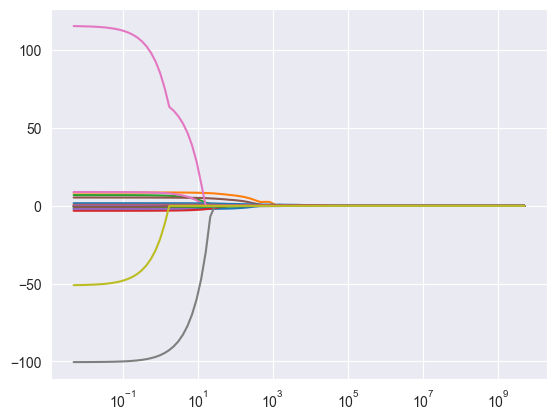

In [20]:
ax = plt.gca()
ax.plot(alphas2, coefs)
ax.set_xscale("log")

# TAHMIN

In [21]:
lasso_model

Lasso()

In [22]:
lasso_model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [23]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [27]:
y_pred = lasso_model.predict(x_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554034

In [29]:
r2_score(y_test, y_pred)  # modelin açıklanabilirliği

0.41422798132366156

# MODEL TUNING

In [45]:
lasso_cv_model = LassoCV(alphas=alphas, cv=10, max_iter=100000).fit(x_train, y_train)

NameError: name 'alphas1' is not defined

In [41]:
lasso_cv_model.alpha_

273

In [42]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(x_train, y_train)

D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.176e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [43]:
y_pred = lasso_tuned.predict(x_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

366.9636282059264

In [47]:
pd.Series(lasso_tuned.coef_, index=x_train.columns)

AtBat         -0.697915
Hits           4.443646
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          1.950734
Years          0.000000
CAtBat        -0.190969
CHits          0.340296
CHmRun        -0.000000
CRuns          0.908840
CRBI           0.452739
CWalks        -0.071064
PutOuts        0.270746
Assists        0.139457
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ELASTICNET REGRESSION
L1 ve L2 yaklaşımlarını birleştirir
Daha etkin düzgünleştirme yapar. Cezalandırma ve değişken seçimi, aşırı öğrenmeye vs dayanıklıdır

In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [50]:
enet_model = ElasticNet().fit(x_train, y_train)

D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [51]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [52]:
enet_model.intercept_

-6.465955602112331

In [53]:
enet_model.predict(x_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [54]:
enet_model.predict(x_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [55]:
y_pred = enet_model.predict(x_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181246

In [57]:
r2_score(y_test, y_pred)

0.41070222469326867

# MODELTUNING

In [75]:
alphas = 10 ** np.linspace(10, -2, 100) * 0.5
enet_cv_model = ElasticNetCV(alphas=alphas, cv=10).fit(x_train, y_train)

D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.9483074881136, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.003151979297, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
D:\Yazilim\Yapay Zeka\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424798792228, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
D:\Yazilim\Yapay Zeka\Machine Lea

In [76]:
enet_cv_model.alpha_

5748.784976988678

In [77]:
enet_cv_model.intercept_

-31.46312122564109

In [78]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [79]:
# final model
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(x_train, y_train)

In [80]:
y_pred = enet_tuned.predict(x_test)

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.97530658505536